# Q&A Activity Week -15

**ActActivity Description
Jio fibre wants to implement AI/ML in their systems. The activity task is to build a network intrusion detector, a predictive model capable of distinguishing between ``bad&#39;&#39; connections, called intrusions or attacks, and ``good&#39;&#39; normal connections.This database contains a standard set of data to be audited, whichincludes a wide variety of intrusions in the network environment.Your target is building a machine efficient learning model using probabilistic approach models, probabilities of bad or good connections using naïve bayes model. This is a multi-class
classification. Fine tune the model and make a model which has at least 97 percent accuracy.**

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("tcp-connection (1).csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [4]:
df['intrusion'].unique()

array(["b'normal.'", "b'smurf.'", "b'neptune.'", "b'warezclient.'",
       "b'satan.'", "b'back.'", "b'ipsweep.'", "b'portsweep.'",
       "b'teardrop.'", "b'guess_passwd.'", "b'nmap.'", "b'imap.'",
       "b'pod.'", "b'phf.'", "b'loadmodule.'", "b'buffer_overflow.'",
       "b'warezmaster.'", "b'land.'", "b'rootkit.'", "b'perl.'",
       "b'multihop.'", "b'ftp_write.'", "b'spy.'"], dtype=object)

In [5]:
df['flag'].unique()

array(["b'SF'", "b'S0'", "b'REJ'", "b'RSTR'", "b'RSTO'", "b'SH'", "b'S1'",
       "b'S3'", "b'S2'", "b'RSTOS0'", "b'OTH'"], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [7]:
#checking missing values
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### No null values

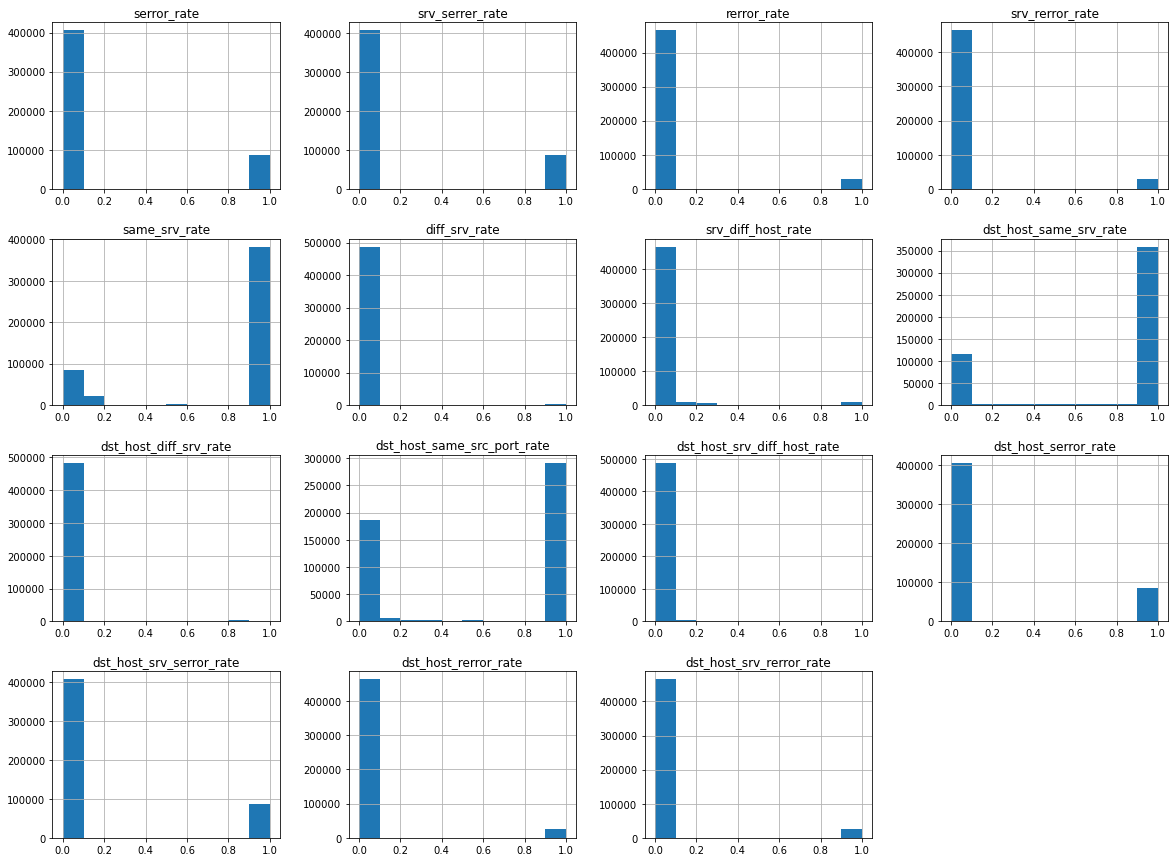

In [8]:
freqgraph = df.select_dtypes(include={'float'})
freqgraph.hist(figsize=(20,15))
plt.show()

In [9]:
df['intrusion'].value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

<AxesSubplot:>

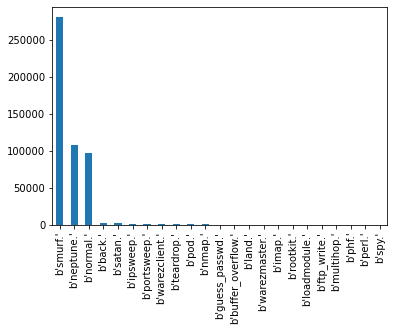

In [10]:
df['intrusion'].value_counts().plot(kind='bar')

In [12]:
# Splitting the data into x and y
x=df.drop(['intrusion'],axis=1)
y=pd.DataFrame(df['intrusion'])

In [15]:
x.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

**One hot encoding of categorical columns of x with more than 2 categories**

In [16]:
cols1=['protocol_type', 'service', 'flag']

In [17]:
x=pd.get_dummies(x,columns=cols1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Columns: 118 entries, duration to flag_b'SH'
dtypes: float64(15), int64(23), uint8(80)
memory usage: 180.9 MB


In [18]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Naïve Bayes’ Classifier

In [19]:
#fitting gaussian naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier1=GaussianNB()
classifier1.fit(x_train,y_train)
y_pred=classifier1.predict(x_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9470228167052612


In [20]:
#confusion metrix
confusion_matrix(y_test,y_pred)

array([[  534,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,    13,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     5,     0,     1,     0,     0,     0,     6,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,    11,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     1,     0,     0,     0,     4,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,   311,     0,     0,     0,

In [21]:
#fitting bernoulli naive bayes to the training set
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.985255777047269
